## Title

### Objective

## Table of Contents

- [Data Analysis Project](#data-analysis-project)
  - [Table of Contents](#table-of-contents)
  - [Data Preprocessing](#data-preprocessing)
    - [Data Loading](#data-loading)
    - [Data Inspection](#data-inspection)
    - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
      - [Data Cleaning](#data-cleaning)
          -[Handling Missing Data and Structural Errors](handling-missing-data-and-structural-errors)
          -[Other Colums cleanup](other-colums-cleanup)
  - [Feature Engineering and Transformation](#feature-engineering-and-transformation)
    - [Discretization](#discretization)
    - [Categorical Encoding](#categorical-encoding)
    - [Variable Transformation](#variable-transformation)
    - [Scaling](#scaling)
    - [Dimensionality Reduction](#dimensionality-reduction)
  - [Model Implementation](#model-implementation)
    - [Supervised Learning](#supervised-learning)
    - [Model Evaluation](#model-evaluation)
  - [Model Optimization](#model-optimization)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Regularization](#regularization)
    - [Visualizations](#visualizations)
  - [Presentation](#presentation)
    - [Clear Objectives](#clear-objectives)
    - [Model Performance](#model-performance)
    - [Interactivity (Optional)](#interactivity-optional)

---

### Import Dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, norm
from sklearn.metrics import confusion_matrix, classification_report

---

## Data Preprocessing

### Data Loading
- Load the `Leads.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_leads = pd.read_csv("Resources/Leads.csv")

# Review the DataFrame
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection
- Handle missing values, column types, and summary statistics.

In [3]:
#checking total rows and cols in dataset
df_leads.shape

(9240, 37)

The Leads.csv has 9,240 rows and 37 columns

In [4]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis (EDA)

Will keep the index number from the original Dataset, and will be removing or transforming data, analyzing one by one


In [6]:
for i, col in enumerate(df_leads.columns):
    print(f"{i} - {col}")

0 - Prospect ID
1 - Lead Number
2 - Lead Origin
3 - Lead Source
4 - Do Not Email
5 - Do Not Call
6 - Converted
7 - TotalVisits
8 - Total Time Spent on Website
9 - Page Views Per Visit
10 - Last Activity
11 - Country
12 - Specialization
13 - How did you hear about X Education
14 - What is your current occupation
15 - What matters most to you in choosing a course
16 - Search
17 - Magazine
18 - Newspaper Article
19 - X Education Forums
20 - Newspaper
21 - Digital Advertisement
22 - Through Recommendations
23 - Receive More Updates About Our Courses
24 - Tags
25 - Lead Quality
26 - Update me on Supply Chain Content
27 - Get updates on DM Content
28 - Lead Profile
29 - City
30 - Asymmetrique Activity Index
31 - Asymmetrique Profile Index
32 - Asymmetrique Activity Score
33 - Asymmetrique Profile Score
34 - I agree to pay the amount through cheque
35 - A free copy of Mastering The Interview
36 - Last Notable Activity


####  No lo neceisto creoData Cleaning

-  no lo necesito Remove duplicates, handle outliers, fix structural errors, and deal with missing data.

Reviewing if the 0 - Prospect ID and 1 - Lead Number columns have any duplicates

In [7]:
print(df_leads.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [8]:
# Check for duplicate values in the "Lead Number" column
duplicate_count_LN = df_leads["Lead Number"].duplicated().sum()
print(f"Number of duplicate 'Lead Number' entries: {duplicate_count_LN}")

# Check for duplicate values in the "Lead Number" column
duplicate_count_PID = df_leads["Prospect ID"].duplicated().sum()
print(f"Number of duplicate 'Prospect ID' entries: {duplicate_count_PID}")

Number of duplicate 'Lead Number' entries: 0
Number of duplicate 'Prospect ID' entries: 0


0 - Prospect ID and 1 - Lead Number are unique identification numbers, they not relevent to this analysis, so they will be dropped. 

In [9]:
#dropping Lead Number columns 
df_leads.drop(["Lead Number","Prospect ID"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Fixing "Select" values, changing them to NaN, this is due to the fact that user did not select any value from the options

In [10]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

Changing all columns to lower case

In [11]:
# changing  all columns values to lower case
for col in df_leads.columns:
    df_leads[col] = df_leads[col].apply(lambda s: s.lower() if type(s)==str else s)

#####  no Handling Missing Data and Structural Errors

In [12]:
#Review null values per column
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# Calculate the percentage of null values for each column
null_percentage = (df_leads.isnull().sum() / len(df_leads)* 100) .round(2)

# Display the percentage of null values per column
print(null_percentage)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Drop columns with more than 45% missing data

In [15]:
cols = df_leads.columns

for i in cols:
    if (100 * (df_leads[i].isnull().sum() / len(df_leads.index))) >= 45:
        df_leads.drop(i, axis=1, inplace=True)

# Check the updated DataFrame
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

Reduced from 37 to 28 columns from previous cleanups, but not done yet, as some columns might contain important information, will analyze each.
Removed columns with more than 45% null content:
11 - Country
13 - How did you hear about X Education
25 - Lead Quality
28 - Lead Profile
30 - Asymmetrique Activity Index
31 - Asymmetrique Profile Index
32 - Asymmetrique Activity Score
33 - Asymmetrique Profile Score


##### Analyzing per Data Type (Categorical vs. Numerical)

In [ ]:
# New DataFrame for Dtype and null values in the same column
df_null_dtype = pd.DataFrame({
    'Dtype': df_leads.dtypes,
    'Null Values': df_leads.isnull().sum()
})

# Display the summary DataFrame
print(df_null_dtype)

##### Categorical Missing Data





In [ ]:
# Filter to show only columns with dtype 'object' and null values greater than 0
df_null_dtype_object_with_nulls = df_null_dtype[(df_null_dtype['Dtype'] == 'object') & (df_null_dtype['Null Values'] > 0)]

# Display the filtered summary DataFrame
print(df_null_dtype_object_with_nulls)

##### Categorical Missing Data by column
- [Lead Source](#lead-source)
- [Last Activity](#last-activity)
- [Country](#country)
- [Specialization](#specialization)
- [What is your current occupation](#what-is-your-current-occupation)
- [What matters most to you in choosing a course](#what-matters-most-to-you-in-choosing-a-course)



Lead Quality - assigned by intuition of an employee, NaN values will be imputed by "Not Sure".

##### 2 - Lead Origin

In [17]:
#Lead Origin
df_leads['Lead Origin'].value_counts(dropna=False)

Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64

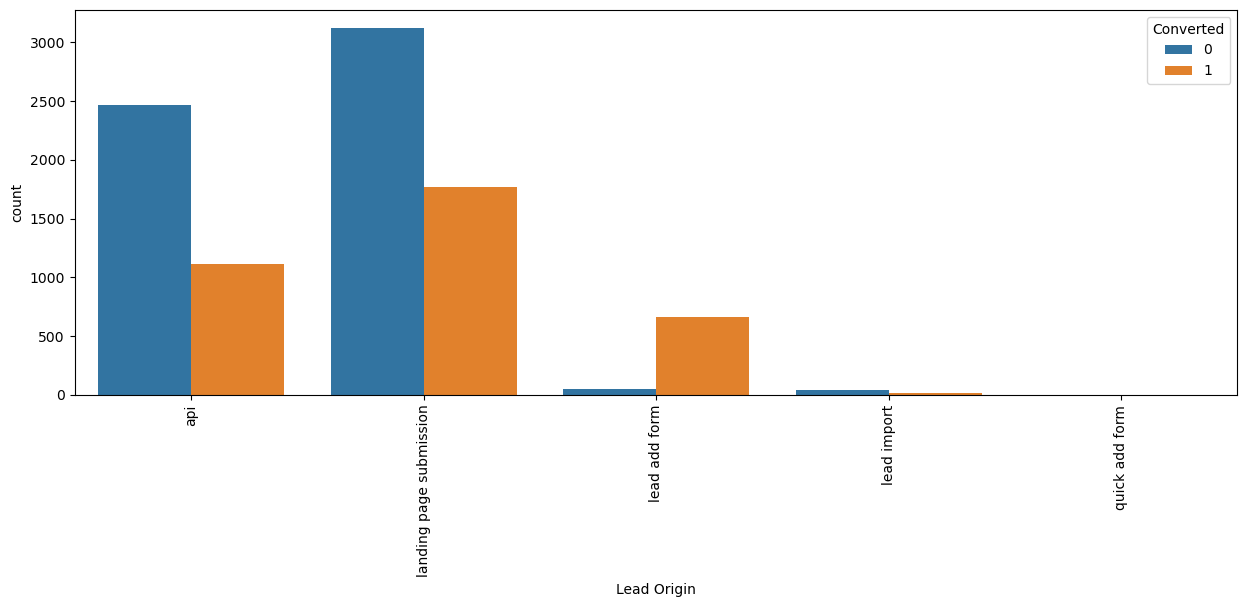

In [20]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

"Landing Page Submission" and "API" are the primary sources of leads, with Landing Page Submission being slightly more effective in terms of conversion rate.
"Lead Add Form" appears to be more efficient, with a higher proportion of leads converting, despite its lower volume.
Improving the conversion rate of leads from "API" could be a focus, as it has a high number of non-converting leads.

Predictive Power:

The chart shows that different lead origins have different conversion rates. For instance, "Lead Add Form" has a higher conversion rate compared to "API." This indicates that the origin of a lead can provide insight into how likely that lead is to convert, which is valuable information for predicting conversions.
Categorical Impact:

"Lead Origin" is a categorical feature that indicates the source of the lead, which can have a significant influence on conversion behavior. If certain origins are consistently associated with high or low conversions, this column will help the model differentiate between high-quality and low-quality leads.
Feature Encoding:

You can encode "Lead Origin" using techniques like one-hot encoding to allow the model to use this information effectively. The resulting features can then be used by the machine learning model to identify the importance of each lead origin in predicting conversion.
Correlation:

Even if the correlation between "Lead Origin" and the target variable (conversion) isn't very high, categorical features often provide non-linear relationships that machine learning models (especially tree-based models like Random Forest or Gradient Boosting) can capture effectively.
Based on this analysis, I would suggest keeping the "Lead Origin" column in the model. It appears to provide information that could be useful in predicting whether a lead will convert or not. If during feature selection or feature importance analysis it turns out to be less important, it can be dropped, but it is worthwhile to include it initially.

02 - Lead Origin Keep

##### 3 - Lead Source 

In [22]:
#checking for mode value
df_leads['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

Bining

In [34]:

# Standardize category names to lowercase
df_leads['Lead Source'] = df_leads['Lead Source'].str.lower()

# Replace variations with consistent names
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'facebook': 'social media'})
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'youtube': 'social media'})

# Remove rows where 'Lead Source' has irrelevant or test values
df_leads = df_leads[~df_leads['Lead Source'].isin(['testone'])]

# Replace synonyms with a consistent value
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'welearnblog_home': 'welearn', 'WeLearn': 'welearn'})


# Recheck the value counts
print(df_leads['Lead Source'].value_counts())


Lead Source
google              2855
direct traffic      2512
olark chat          1751
organic search      1125
reference            442
welingak website     129
referral sites       123
social media          33
other                 20
Name: count, dtype: int64


Remove options with  values under 50

In [35]:
# Define a cutoff value
cutoff_value = 50

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Lead Source'].value_counts()[df_leads['Lead Source'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Lead Source'].value_counts())

Lead Source
google              2855
direct traffic      2512
olark chat          1751
organic search      1125
reference            442
welingak website     129
referral sites       123
Other                 53
Name: count, dtype: int64


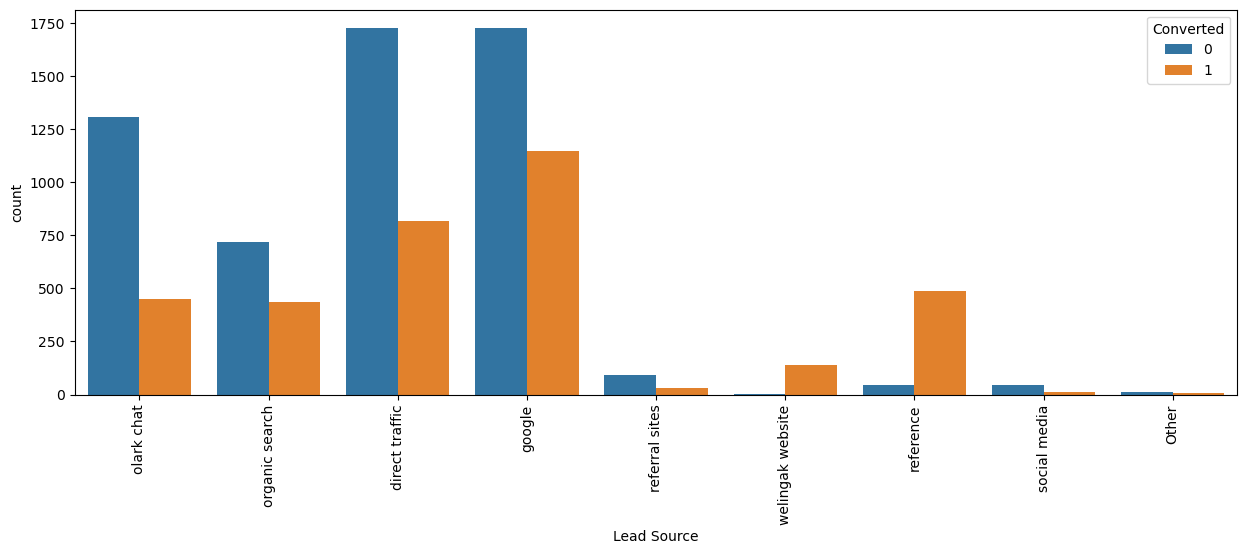

In [25]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()




Different lead sources show varied conversion rates, indicating that the source has an impact on the likelihood of conversion. For instance, references and Google have higher conversion rates compared to direct traffic.


"Lead Source" can help the model capture important distinctions between different types of leads. For example, leads from referrals or specific websites may be of higher quality, and the model can use this information to predict conversion more accurately.


If certain lead sources, like "Direct Traffic," have a low conversion rate, this information can be used for business insights as well, enabling targeted marketing strategies to improve conversion.
To include "Lead Source" in a machine learning model, you would need to encode it properly, such as using one-hot encoding, which allows the model to recognize different sources and learn from their distinct behaviors.

Including "Lead Source" will likely improve the model's performance, as it provides essential context regarding lead quality and conversion likelihood.

3- Lead Sources  - Keep 


#### 4 - Do Not Email & 5 - Do Not Call

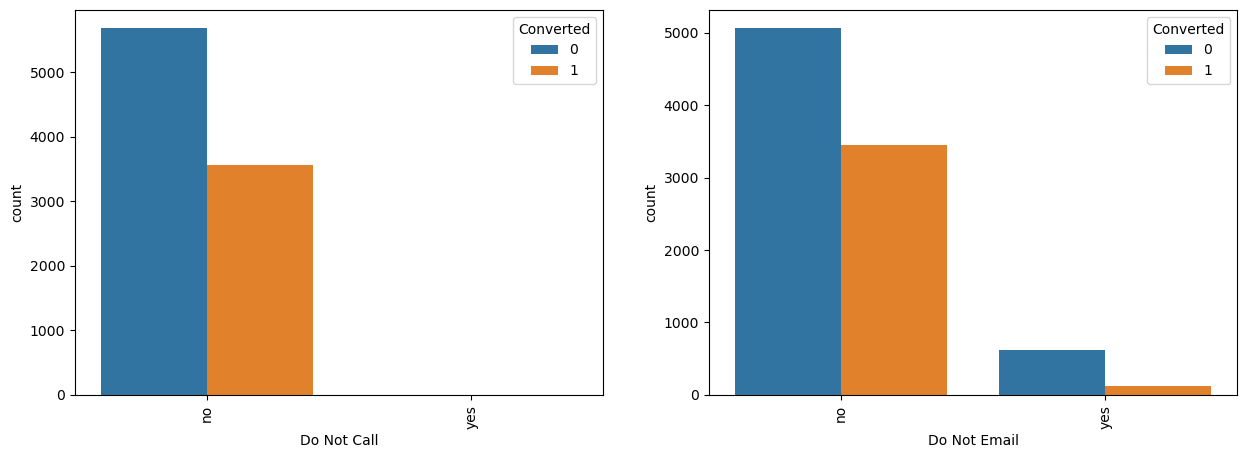

In [28]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))

# Plotting 'Do Not Call' with 'Converted' as hue
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Call', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plotting 'Do Not Email' with 'Converted' as hue
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Email', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

The "Do Not Email" feature seems to have a stronger effect on conversion compared to "Do Not Call", suggesting that restricting email communication negatively affects conversion rates.
I beleive that the double negation is misleading, and most people rather not getting contact.
Leads that do not want to be contacted (either by call or email) may be less likely to convert, and including this information helps the model understand this behavior
As both charts have a significant amount of convertions, we will keep these columns

4 - Do Not Email - Keep </br>
5 - Do Not Call - Keep

##### 6 - <b> Converted is the dependent variable (y), the one we are trying to achieve, we want to increase the number or 1's (conversions) <b>  

6 - Converted - Keep

##### 7 - Total Visits

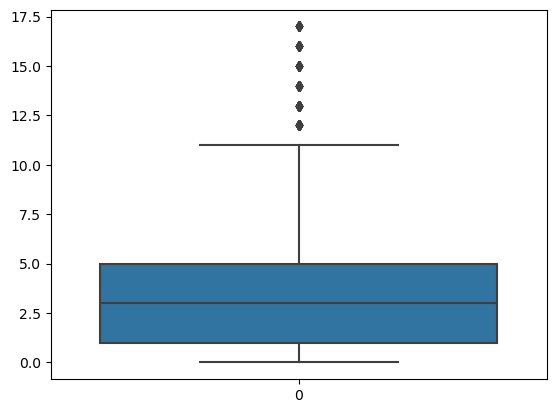

In [36]:
#Total Visits
#visualizing spread of variable

sns.boxplot(df_leads['TotalVisits'])
plt.show()


There are outliers in the data, cap the outliers to 95%for analysis

In [37]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9019.000000
mean        3.206786
std         2.990214
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%         9.000000
99%        13.820000
max        17.000000
Name: TotalVisits, dtype: float64

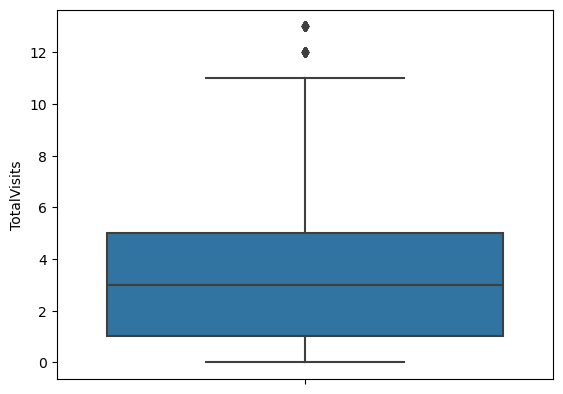

In [38]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads.TotalVisits.quantile(0.99)
df_leads = df_leads[(df_leads.TotalVisits <= Q3)]
Q1 = df_leads.TotalVisits.quantile(0.01)
df_leads = df_leads[(df_leads.TotalVisits >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

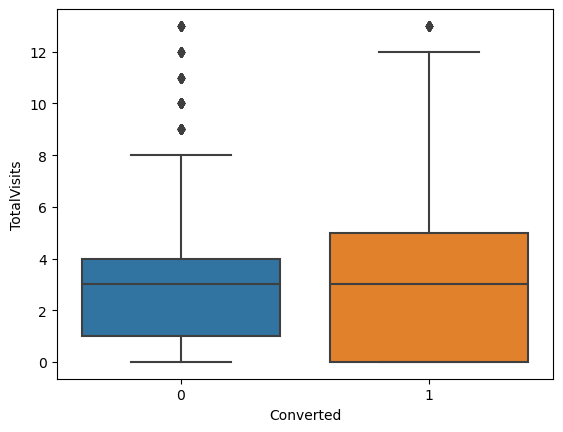

In [39]:

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

wever, the upper quartile (75th percentile) is higher for converted leads, indicating that leads that convert tend to have a higher number of total visits compared to those that do not convert.

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


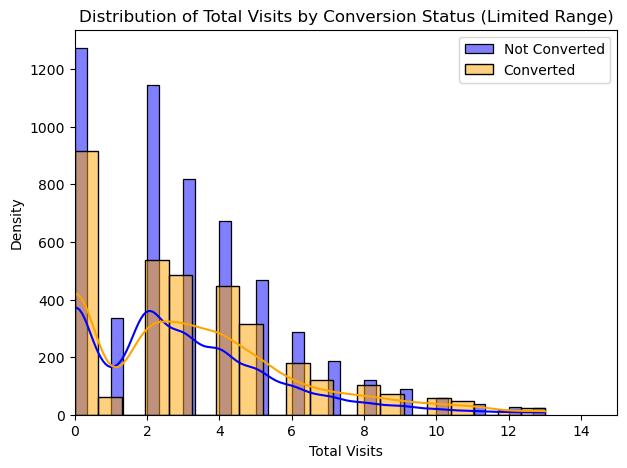

In [42]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['TotalVisits'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['TotalVisits'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Visits by Conversion Status (Limited Range)')
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


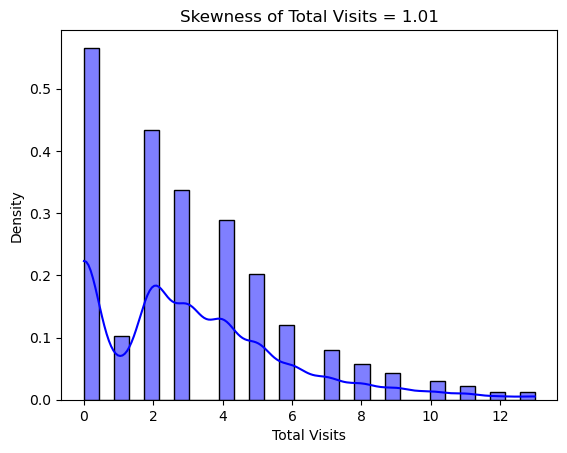

In [40]:
# Calculate skewness
skewness = skew(df_leads['TotalVisits'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['TotalVisits'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Total Visits = {skewness_rounded}")
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.show()

The distribution is heavily skewed to the left, with the highest peak around 0-2 visits.
The overall pattern shows that many leads that do not convert tend to have fewer visits.
However, compared to non-converted leads, a higher number of converted leads continue to visit beyond 3 times.
he density for converted leads is higher at 4-6 visits compared to non-converted, indicating that more visits are generally associated with a higher likelihood of conversion.

7 - Total Visits - Keep

##### 8 - Total Time Spent on Website

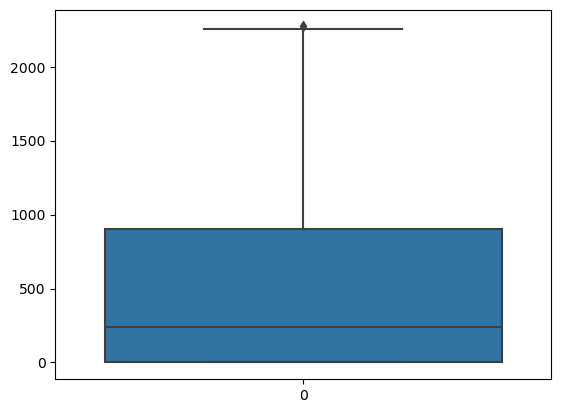

In [54]:

#visualizing boxplot 

sns.boxplot(df_leads['Total Time Spent on Website'])
plt.show()

There is a single point plotted above the upper whisker, which indicates an outlier in the dataset.
The data appears to be right-skewed, with some leads having values far greater than most other leads.

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


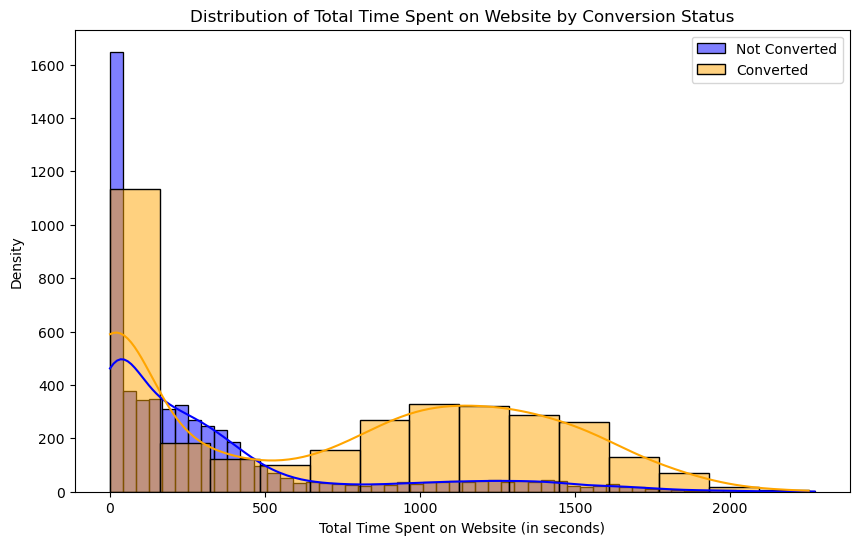

In [45]:
# Plotting the distribution of "Total Time Spent on Website" split by Converted and Not Converted
plt.figure(figsize=(10, 6))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['Total Time Spent on Website'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['Total Time Spent on Website'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Time Spent on Website by Conversion Status')
plt.xlabel('Total Time Spent on Website (in seconds)')
plt.ylabel('Density')
plt.legend()

plt.show()

uggesting that those who converted generally spent more time on the website compared to those who did not convert.
-converted leads are heavily skewed to the left, with the highest density at very short times spent.
Non-converted leads are heavily skewed to the left, with the highest density at very short times spent.
Converted leads tend to spend more time on the website, as indicated by the higher density in the mid-range (500-1500 seconds).


8 -  Total Time Spent on Website - Keep

##### 9 - Page Views Per Visit

In [53]:
null_percentage = df_leads['Page Views Per Visit'].isnull().mean() * 100
print(f"Percentage of null values in 'Page Views Per Visit': {null_percentage:.2f}%")

Percentage of null values in 'Page Views Per Visit': 0.00%


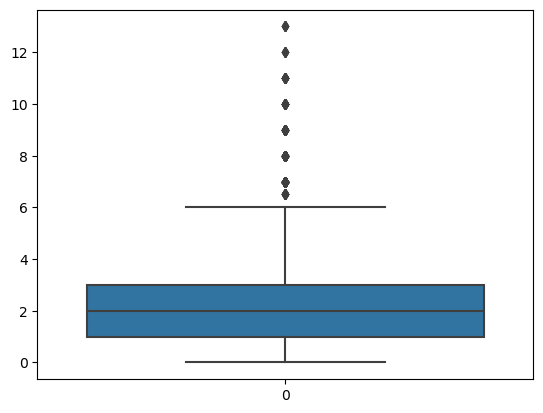

In [57]:

#visualizing boxplot 

sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

The IQR (from 1 to 4) indicates that the spread of most of the data is relatively narrow, with many values clustering between 1 and 4.
There are several outliers above 6, suggesting that some data points are much higher than the general trend.
the presence of outliers suggests that some users view an unusually high number of pages per visit, which could be considered when modeling or further analyzing user behavior. Depending on the context, you might consider handling these outliers (e.g., through capping or transformation) to improve model performance or understand user patterns better.

In [58]:
#capping 
#checking percentile values for "Page Views Per Visit"

df_leads['Page Views Per Visit'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    8928.000000
mean        2.303172
std         1.993970
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

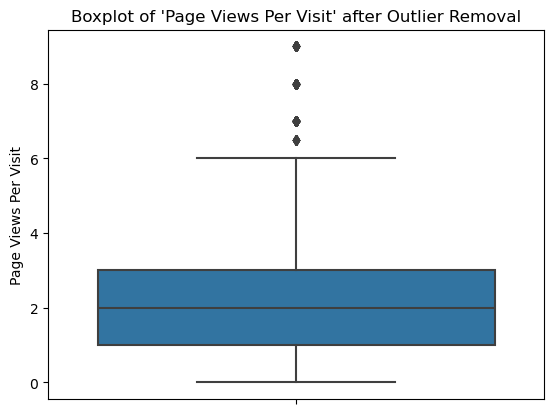

In [60]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

# Remove top & bottom 5% of the Column Outlier values
Q3 = df_leads["Page Views Per Visit"].quantile(0.99)
Q1 = df_leads["Page Views Per Visit"].quantile(0.01)

# Filtering the data to remove top and bottom 5%
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3) & (df_leads["Page Views Per Visit"] >= Q1)]

# Plotting the boxplot after outlier treatment
sns.boxplot(y=df_leads["Page Views Per Visit"])
plt.title("Boxplot of 'Page Views Per Visit' after Outlier Removal")
plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


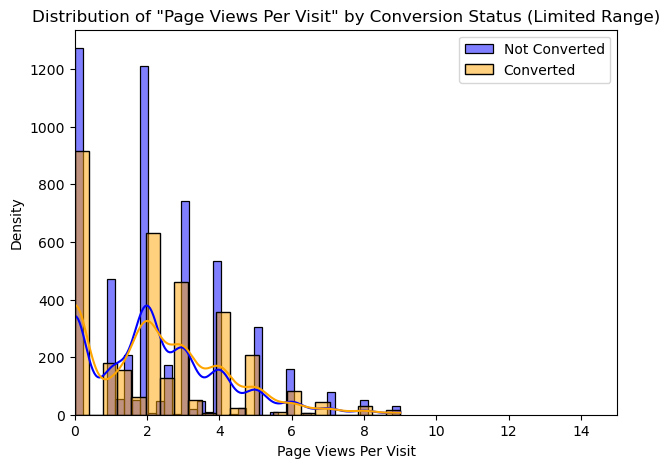

In [61]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]["Page Views Per Visit"], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]["Page Views Per Visit"], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of "Page Views Per Visit" by Conversion Status (Limited Range)')
plt.xlabel("Page Views Per Visit")
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

The distribution shows more blue bars compared to orange bars for higher counts of page views, which means that non-converted leads had more page views across different ranges. This indicates that having multiple page views alone does not guarantee conversion.
Converted leads show a higher distribution for 3-5 page views, indicating that a moderate level of exploration is correlated with a higher chance of conversion.
After 6 page views, the number of both converted and non-converted leads drops significantly, suggesting that extended browsing does not strongly influence conversion.

##### 10 - Last Activity

In [ ]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9019.000000
mean        3.206786
std         2.990214
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%         9.000000
99%        13.820000
max        17.000000
Name: TotalVisits, dtype: float64

In [46]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3388
sms sent                        2704
olark chat conversation          966
page visited on website          567
converted to lead                428
email bounced                    311
email link clicked               264
form submitted on website        112
unreachable                       87
unsubscribed                      61
had a phone conversation          24
view in browser link clicked       5
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [47]:
# Impute nan values with email opened  
df_leads['Last Activity'] = df_leads['Last Activity'].replace(np.nan ,'Email Opened')

In [48]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3388
sms sent                        2704
olark chat conversation          966
page visited on website          567
converted to lead                428
email bounced                    311
email link clicked               264
form submitted on website        112
unreachable                       87
unsubscribed                      61
had a phone conversation          24
view in browser link clicked       5
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [49]:
# Define a cutoff value
cutoff_value = 100

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Last Activity'].value_counts()[df_leads['Last Activity'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Last Activity'] = df_leads['Last Activity'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Last Activity'].value_counts())

Last Activity
email opened                 3388
sms sent                     2704
olark chat conversation       966
page visited on website       567
converted to lead             428
email bounced                 311
email link clicked            264
Other                         188
form submitted on website     112
Name: count, dtype: int64


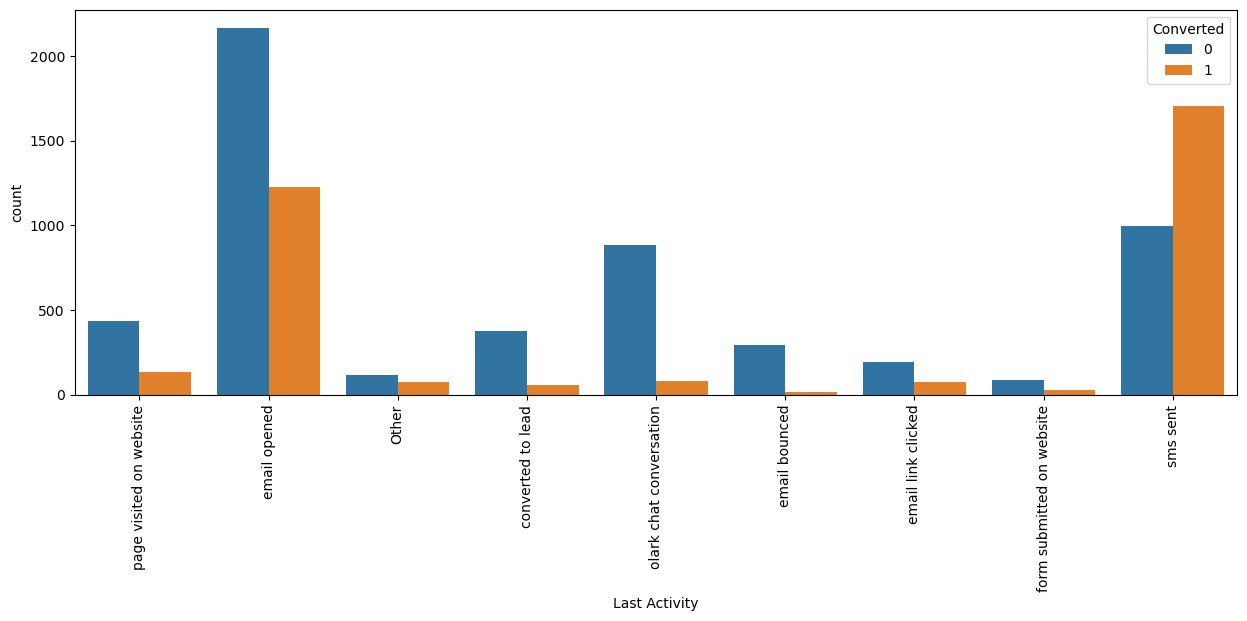

In [52]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

ggesting that while email engagement is common, it does not guarantee conversion.
SMS Sent stands out as a major activity with a high conversion rate.
The orange bar (converted) is higher than the blue bar (not converted), indicating that sending an SMS has a positive impact on conversion. This activity is associated with more conversions than non-conversions.
The blue bar is much higher compared to the orange bar, indicating that leads with Olark Chat Conversation are more likely to not convert.
This suggests that while chatting might engage the lead, it doesn’t necessarily lead to conversion.
SMS Sent appears to be a strong driver of conversion. Leads who were sent an SMS are more likely to convert, indicating that SMS is an effective follow-up method.
Email Opened is also a common last activity, but most of these leads do not convert, suggesting that simply opening an email is not sufficient to drive conversions.
Olark Chat Conversation has a higher likelihood of non-conversion, which could mean that leads engaged through chat require further actions to convert.

10 - Last Activity - Keep

##### Country

In [ ]:
# country 
df_leads.Country.value_counts()

In [23]:
#imputing missing values with India as it's the mode
df_leads['Country'] = df_leads['Country'].replace(np.nan,'india')

In [ ]:
#plot  spread of Country after replacing null values

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Country', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

In [ ]:
# Calculate the percentage of rows with "India" in the Country column
india_percentage = (df_leads['Country'].value_counts()['india'] / df_leads['Country'].count()) * 100

# Print the percentage
print(f"'India' within Country column: {india_percentage:.2f}%")

Because >96% of the data is mapped as india, making Country data heavily skewed and not required for the modeling process, will drop this column from the DF. 

In [26]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [27]:
# dropping country column
df_leads.drop('Country',axis=1,inplace =True)

##### Specialization

In [ ]:
#describe specialization
df_leads.Specialization.describe()

In [29]:
# Imputing NaN values with "Not Specified"

df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Not Specified')

In [ ]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()



In [31]:
#combining Management Specializations because they show similar trends

df_leads['Specialization'] = np.where(df_leads['Specialization'].isin(['finance management', 'human resource management',
                                                                       'marketing management', 'operations management',
                                                                       'it projects management', 'supply chain management',
                                                                       'healthcare Management', 'hospitality management',
                                                                       'retail management']),
                                       'Management_Specializations', df_leads['Specialization'])

In [ ]:
# specializations
df_leads.Specialization.value_counts()

In [ ]:
#plotting the spred of new Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()


!!!We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

Focus should be more on the Specialization with high conversion rate.

##### What is your current occupation?

In [ ]:
#What is your current occupation

df_leads['What is your current occupation'].value_counts(dropna=False)

In [35]:
# Imputing NaN values with "unemployed"

df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'unemployed')

In [ ]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

!!!!Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

##### What matters most to you in choosing a course

In [ ]:
#checking value counts

df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

In [38]:
# Imputing NaN values with "unemployed"

df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'better career prospects')

In [ ]:
#plotting spread of What matters most to you in choosing a course columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Highly skewed column, will add to drop list

In [ ]:
#Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!
# 'How did you hear about X Education' impute 'other' as if leads has not selected means it is not in options
leads_data['How did you hear about X Education']=leads_data['How did you hear about X Education'].fillna('other')

##### Numerical Missing Data



In [ ]:
# Filter to show only columns with dtype 'float64' or 'int64' and null values greater than 0
df_null_dtype_numeric_with_nulls = df_null_dtype[
    ((df_null_dtype['Dtype'] == 'float64') | (df_null_dtype['Dtype'] == 'int64')) & (df_null_dtype['Null Values'] > 0)
]

# Display the filtered summary DataFrame
print(df_null_dtype_numeric_with_nulls)

##### Numerical Data cleaning 
- [TotalVisits](#totalvisits)
- [Page Views Per Visit](#page-views-per-visit)

TotalVisits
Page Views Per Visit
Asymmetrique columns have values 1, 2, 3 which is score assigned to each customer based on their activity and their profile. Will replace blank with 0 score.
Page Visits nulls will be be replaced with 0.

!!!The Median for converted 

Most users/customers are visiting fewer times, with very few having higher visit counts.
The positive skew indicates that there might be some outliers or a small group of users who have a significantly higher number of visits compared to the rest.
This distribution can be useful in understanding the behavior of users/customers, showing that a majority do not make frequent visits, while a smaller proportion are more engaged.

##### Page Views Per Visit

In [ ]:
df_leads['Page Views Per Visit'].describe()

In [ ]:
sns.boxplot(df_leads['Page Views Per Visit'])

There are outliers in the data, cap the outliers to 95%for analysis

In [ ]:
#checking percentile values for "Page Views Per Visit"

df_leads['Page Views Per Visit'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

In [ ]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads["Page Views Per Visit"].quantile(0.95)
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3)]
Q1 = df_leads["Page Views Per Visit"].quantile(0.05)
df_leads = df_leads[(df_leads["Page Views Per Visit"] >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

In [ ]:

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)

In [ ]:
# Calculate skewness
skewness = skew(df_leads['Page Views Per Visit'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['Page Views Per Visit'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Page Views Per Visit = {skewness_rounded}")
plt.xlabel('Page Views Per Visit')
plt.ylabel('Density')
plt.show()

!!Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit
Most users seem to view 1-2 pages per visit, with fewer users viewing more than that.
The distribution has some minor peaks indicating that there are distinct groups of users who tend to view a specific number of pages, such as 2, 3, or 4 pages, before exiting.
Overall, the skewness is low, which means that while the data is slightly skewed to the right, it is relatively balanced, with no extreme outliers.
This suggests that while most users view only a few pages per visit, there is still a significant portion of users viewing a moderate number of pages, indicating a varied level of engagement across different visitors.

### Other Colums cleanup

##### Tags

In [ ]:
#checking value counts of Tag variable
df_leads['Tags'].value_counts(dropna=False)


In [ ]:
#plotting spread of Tags columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

##### Lead Source

In [ ]:
#check value counts of Lead Source column

df_leads['Lead Source'].value_counts(dropna=False)

In [ ]:
#plotting spread of Lead Source columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

!!***Google and direct trafic most leads come from
high conversion rates for refernce welingak website.  
 improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

---

### Correlation

In [ ]:
# Selecting only the numerical columns
numerical_df = df_leads.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Converted vs. Total Time Spent on Website: There is a moderate positive correlation (0.35) between "Converted" and "Total Time Spent on Website". This indicates that leads that spend more time on the website are more likely to convert.

Converted vs. TotalVisits: There is a very weak positive correlation (0.05) between "Converted" and "TotalVisits". This suggests that the number of total visits to the website does not strongly influence whether a lead converts or not.

Converted vs. Page Views Per Visit: There is an extremely weak negative correlation (-0.0049) between "Converted" and "Page Views Per Visit", implying that page views per visit do not have much impact on conversions.

Correlation among the features:

TotalVisits vs. Page Views Per Visit: There is a moderate positive correlation, which suggests that more total visits are generally associated with a higher number of page views per visit.
TotalVisits vs. Total Time Spent on Website: There is a moderate positive correlation, meaning that an increase in total visits is generally associated with more time spent on the website.
TotalVisits_sqrt is likely a transformed version of "TotalVisits", and it also shows moderate correlations with the other variables, which might have been created to normalize the distribution.
In summary, "Total Time Spent on Website" is the only variable with a somewhat meaningful correlation with conversion, indicating that investing efforts in increasing time spent on the website might lead to better conversion rates. Other variables, such as "TotalVisits" and "Page Views Per Visit," do not seem to have a strong effect on conversion.

In [ ]:
sample_size = min(len(df_leads), 10000)
subset = df_leads.sample(n=sample_size, random_state=42)
correlation_matrix = subset.corr()

### Heatmap

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Feature Engineering and Transformation

### Discretization
- Convert continuous variables into discrete ones if necessary (e.g., binning).


### Categorical Encoding
- Use one-hot encoding for categorical features.

### Variable Transformation
- Apply log or square-root transformations for skewed data.

### Scaling
- Normalize or standardize numerical features.

### Dimensionality Reduction
- Use Principal Component Analysis (PCA) to reduce feature dimensions.

## Model Implementation

### Supervised Learning
- Logistic Regression, Decision Trees, Random Forest, Neural Networks.

### Model Evaluation
- Calculate baseline metric (accuracy, precision, recall) and performance on unseen data.


## Model Optimization

### Hyperparameter Tuning
- Grid search, random search.

### Regularization
- Optional L2 regularization.

### Visualizations
- Learning curves, feature importance, showing iterative improvements.

## Presentation

### Clear Objectives
- Communicate the problem statement and solution.

### Model Performance
- Use visualizations (learning curves, comparison of models).

### Interactivity (Optional)
- If meaningful, incorporate interactive visualizations.